---
title: "Dealing with dates on axis"
author: "Damien Martin"
date: "2024-05-27 13:00"
categories: [data-vis, plotnine, snippet]
image: "image.jpg"
description: "Displaying dates in plots"
---

# Problem

Dates are often cumbersome as their format is really long. This post gives a few techniques for formatting that dates a little nicer.

# Solutions

- angle text
- format date using format codes
- format date using custom formatting
- make plot wider

Andrew Heiss has a [blog post](https://www.andrewheiss.com/blog/2022/06/23/long-labels-ggplot/) for long labels in `gg-plot` in R. 

Note that the `dodge` solution does not appear to be ported into `plotnine` from `ggplot`.


### Desired attribution:
* Heiss, Andrew. 2022. “Quick and Easy Ways to Deal with Long Labels in Ggplot2.” June 23, 2022. https://doi.org/10.59350/x7xtj-3dh31.

# Setup

We start by grabbing some data about the daily highs and lows in Seattle, and making a default plot

In [1]:

import plotnine as p9
import pandas as pd

url="https://raw.githubusercontent.com/russellromney/seattle-weather/master/seattleWeather_1948-2017.csv"
weather = pd.read_csv(url)
weather["DATE"] = pd.to_datetime(weather["DATE"])
weather["RAIN"] = weather["RAIN"] == "TRUE"

weather.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,False
1,1948-01-02,0.59,45,36,False
2,1948-01-03,0.42,45,35,False
3,1948-01-04,0.31,45,34,False
4,1948-01-05,0.17,45,32,False


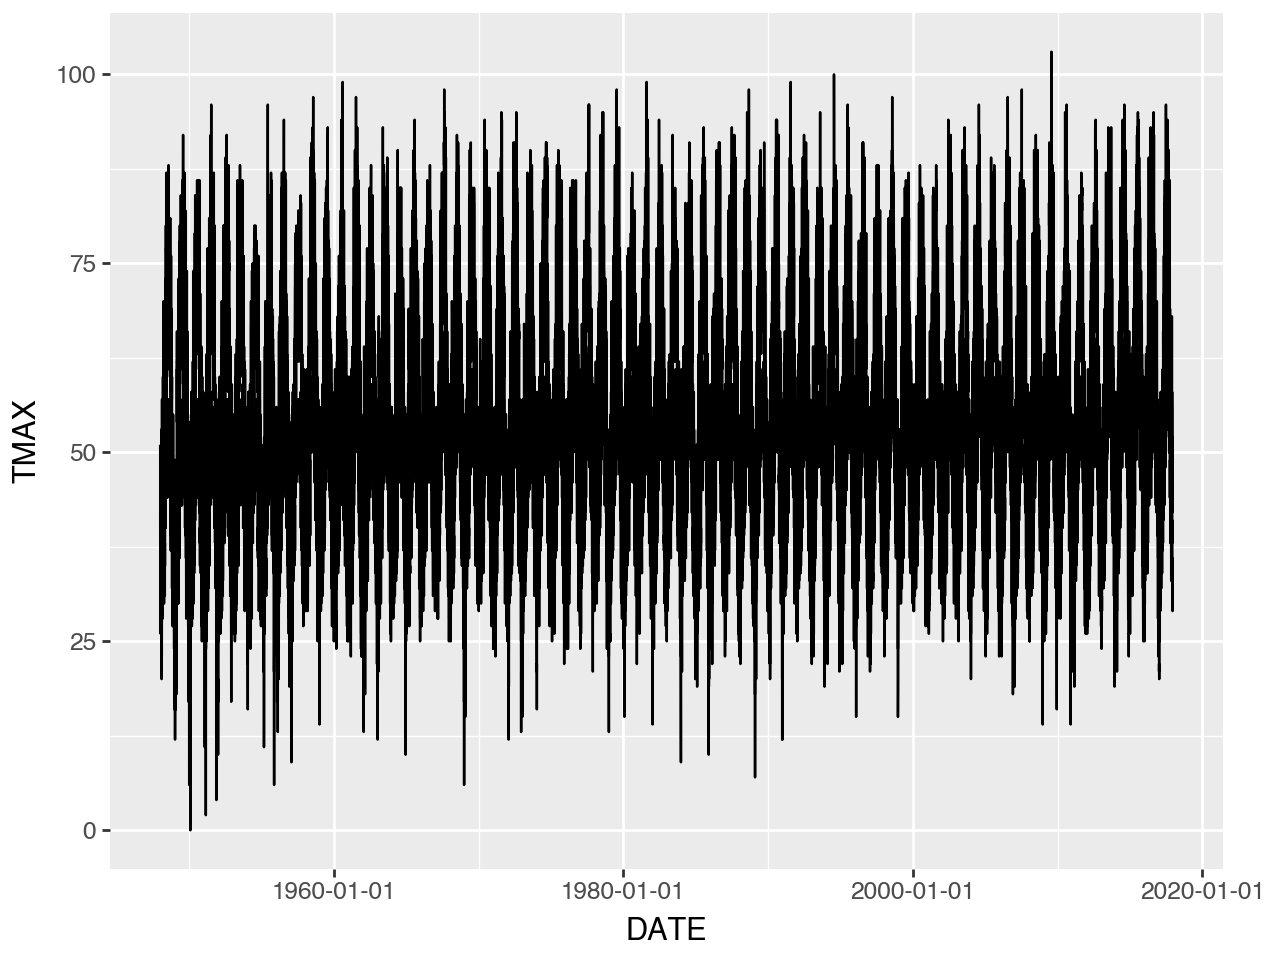

In [2]:
(
    p9.ggplot(weather, p9.aes(x="DATE")) 
    + p9.geom_line(mapping=p9.aes(y="TMAX"))
    + p9.geom_line(mapping=p9.aes(y="TMIN"))
)

The shear volume of data is going to make this difficult, as well as the difficulty with dates. Let's use daily data, but over the most recent two years in the dataset. This gets us to our starting point.

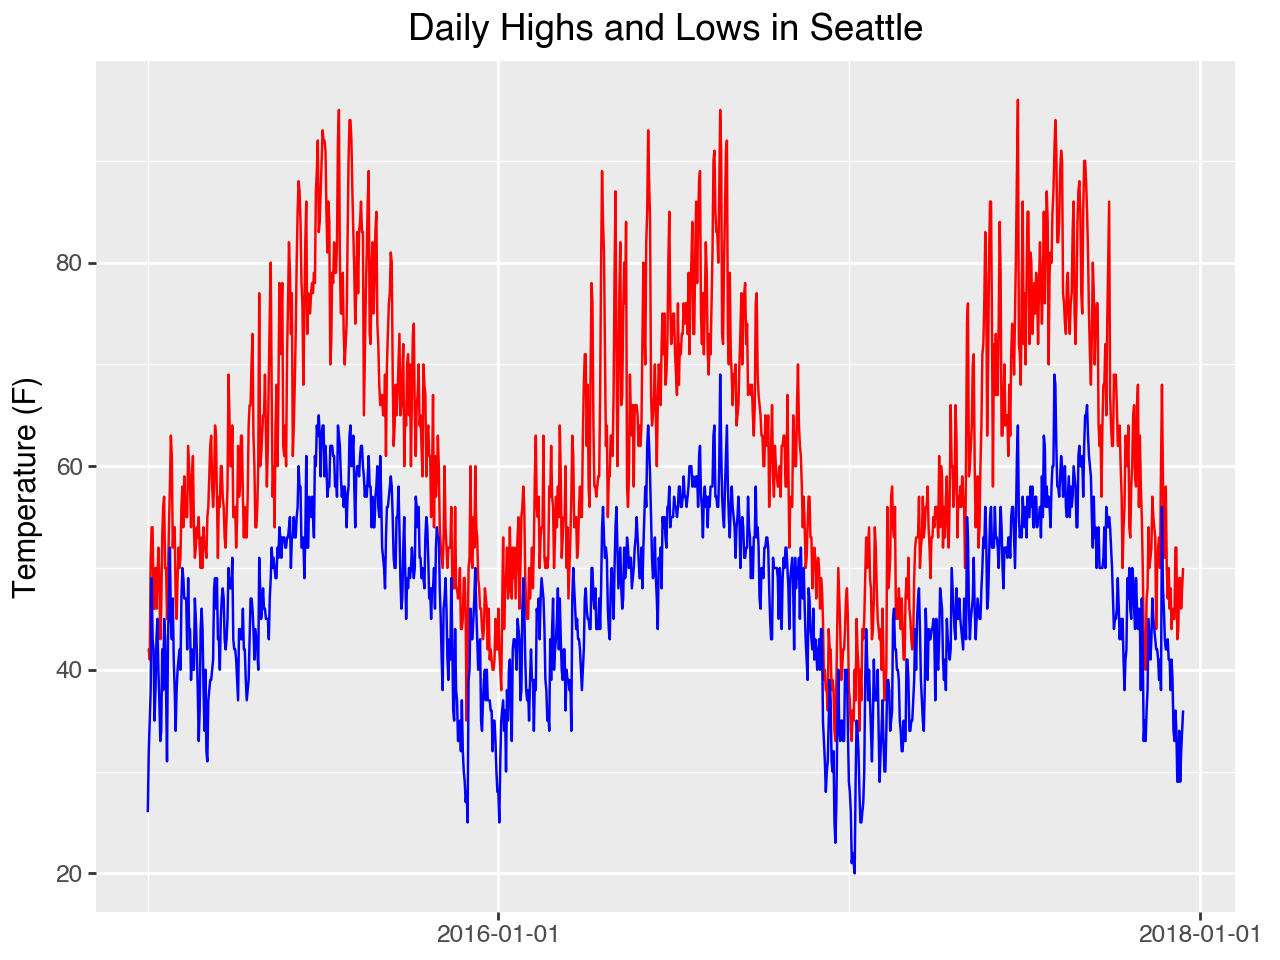

In [3]:
weather_recent = weather[weather["DATE"].dt.year >= 2015]

(
    p9.ggplot(weather_recent, p9.aes(x="DATE")) 
    + p9.geom_line(mapping=p9.aes(y="TMAX"), color="red")
    + p9.geom_line(mapping=p9.aes(y="TMIN"), color="blue")
    + p9.labs(
        title="Daily Highs and Lows in Seattle", 
        y="Temperature (F)", 
        x=""
    )
)

# Techniques

## Angled text

* Use `p9.theme(axis_text_x=p9.element_text(angle=xx))`

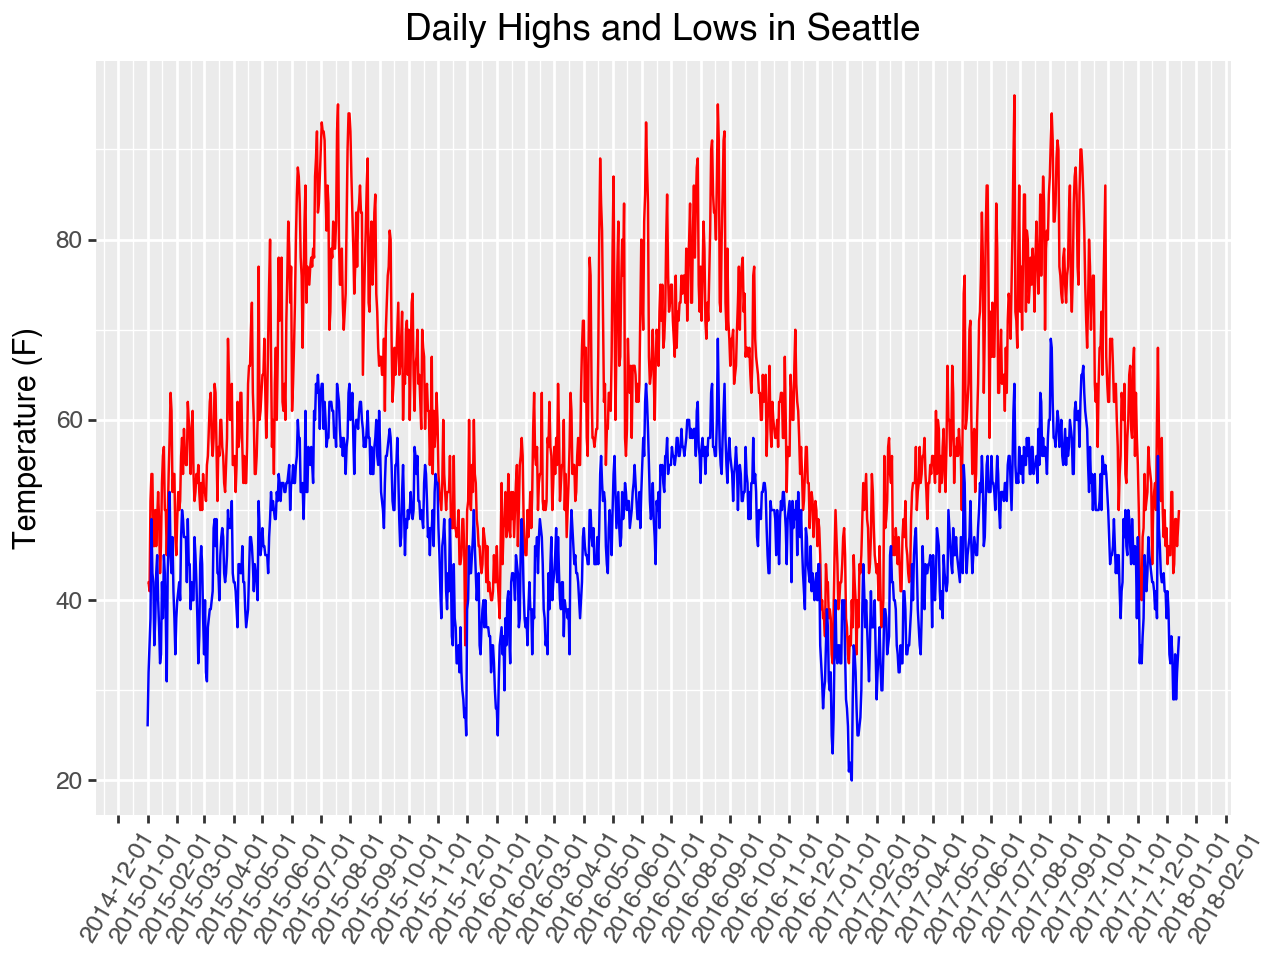

In [4]:
(
    p9.ggplot(weather_recent, p9.aes(x="DATE")) 
    + p9.geom_line(mapping=p9.aes(y="TMAX"), color="red")
    + p9.geom_line(mapping=p9.aes(y="TMIN"), color="blue")
    + p9.labs(
        title="Daily Highs and Lows in Seattle", 
        y="Temperature (F)", 
        x=""
    )
    + p9.scale_x_date(breaks='1 month')
    + p9.theme(axis_text_x=p9.element_text(angle=60))
)

## Format the date (e.g. YYYY-MM)

* Use `scale_x_date(date_labels=date_format_string)`
    * `date_format_string` defaults to ISO standard: `"%Y-%m-%d"`

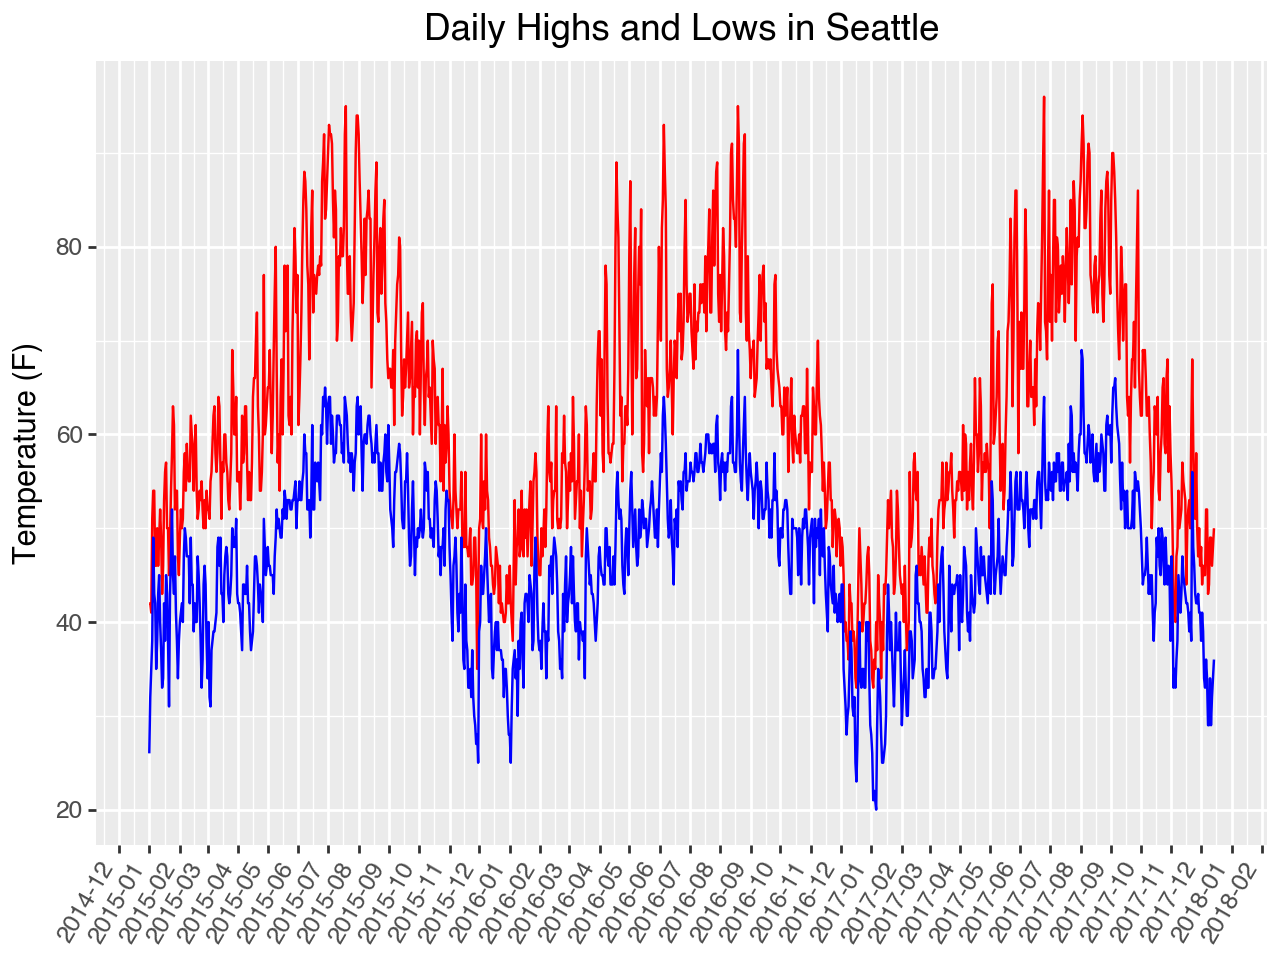

In [5]:
(
    p9.ggplot(weather_recent, p9.aes(x="DATE")) 
    + p9.geom_line(mapping=p9.aes(y="TMAX"), color="red")
    + p9.geom_line(mapping=p9.aes(y="TMIN"), color="blue")
    + p9.labs(
        title="Daily Highs and Lows in Seattle", 
        y="Temperature (F)", 
        x=""
    )
    + p9.scale_x_date(breaks='1 month', date_labels="%Y-%m")
    + p9.theme(axis_text_x=p9.element_text(angle=60, hjust=1))
)

## Manually set the labels

* Use the `labels` argument
* Can use an explicit list, but you give up plotnine determining the breaks for you
* Can use a `lambda` to take the Timestamp object, and transform it to a string

Here is a way we can do the previous version (setting `date_format` to `"%Y-%m"`). 

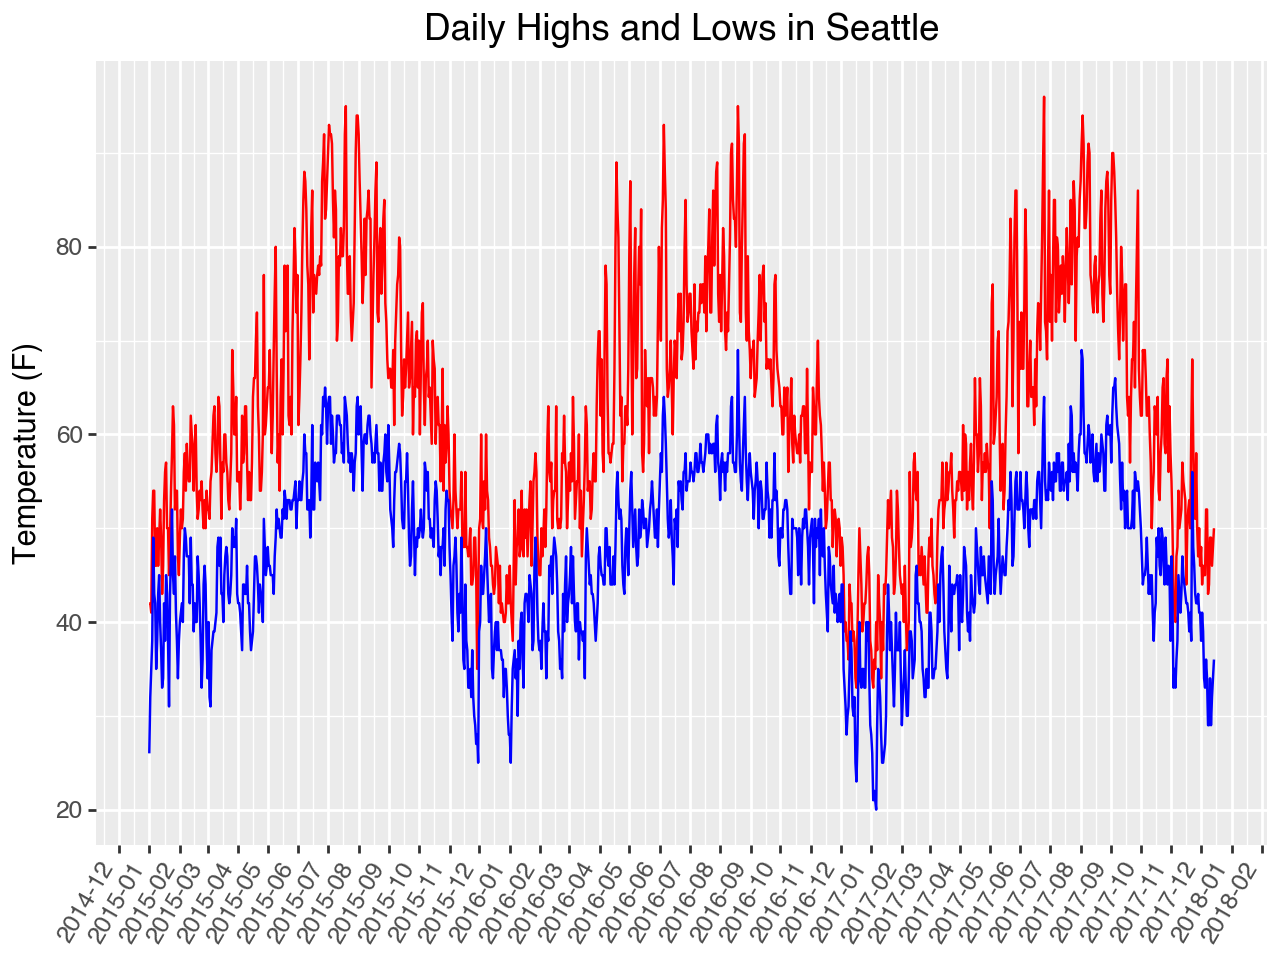

In [6]:
(
    p9.ggplot(weather_recent, p9.aes(x="DATE")) 
    + p9.geom_line(mapping=p9.aes(y="TMAX"), color="red")
    + p9.geom_line(mapping=p9.aes(y="TMIN"), color="blue")
    + p9.labs(
        title="Daily Highs and Lows in Seattle", 
        y="Temperature (F)", 
        x=""
    )
    + p9.scale_x_date(breaks='1 month', labels=lambda d: [entry.strftime("%Y-%m") for entry in d])
    + p9.theme(axis_text_x=p9.element_text(angle=60, hjust=1))
)

Let's do a different version, which only shows the year in January

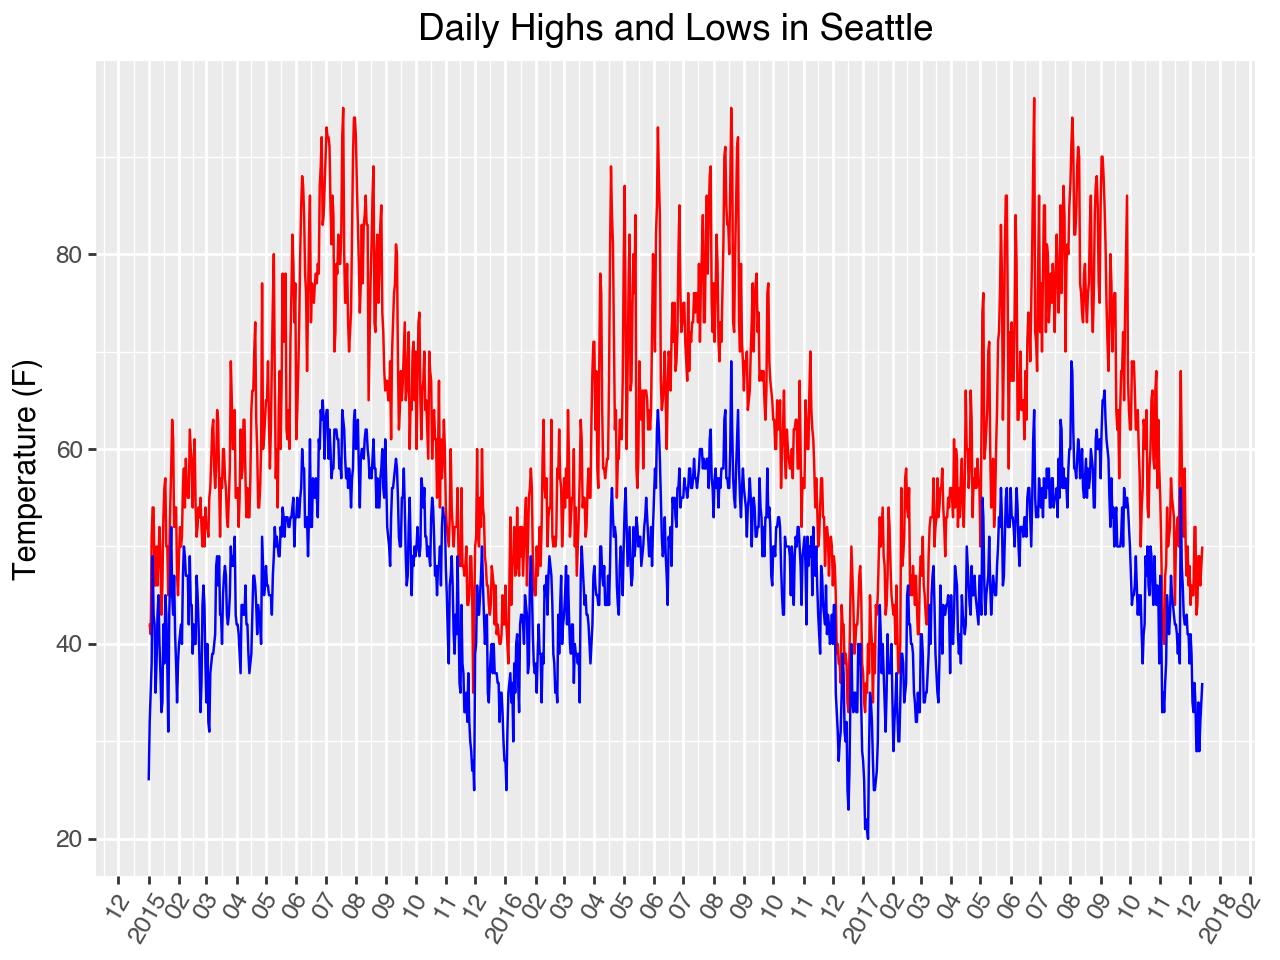

In [7]:
label_func = lambda d: [date.strftime("%Y") if date.month==1 else date.strftime("%m") for date in d]

(
    p9.ggplot(weather_recent, p9.aes(x="DATE")) 
    + p9.geom_line(mapping=p9.aes(y="TMAX"), color="red")
    + p9.geom_line(mapping=p9.aes(y="TMIN"), color="blue")
    + p9.labs(
        title="Daily Highs and Lows in Seattle", 
        y="Temperature (F)", 
        x=""
    )
    + p9.scale_x_date(breaks='1 month', labels=label_func)
    + p9.theme(axis_text_x=p9.element_text(angle=60))
)

Even better:

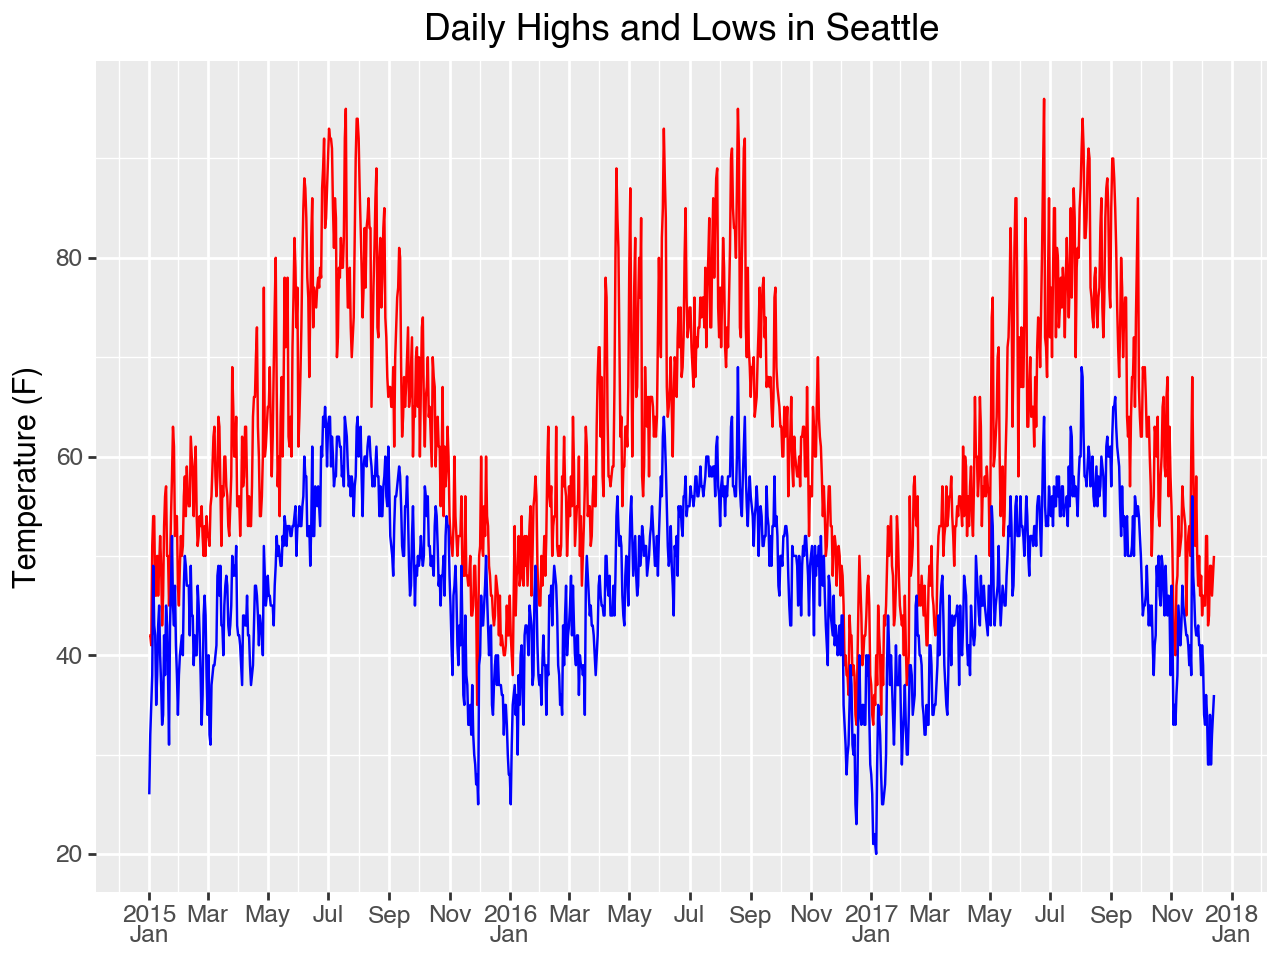

In [8]:
label_func = lambda d: [date.strftime("%Y\n%b") if date.month==1 else date.strftime("%b") for date in d]

(
    p9.ggplot(weather_recent, p9.aes(x="DATE")) 
    + p9.geom_line(mapping=p9.aes(y="TMAX"), color="red")
    + p9.geom_line(mapping=p9.aes(y="TMIN"), color="blue")
    + p9.labs(
        title="Daily Highs and Lows in Seattle", 
        y="Temperature (F)", 
        x=""
    )
    + p9.scale_x_date(breaks='2 month', labels=label_func)
    + p9.theme()
)

## Make the plot wider

* Use the `figure_size=(h, w)` argument in `p9.theme`

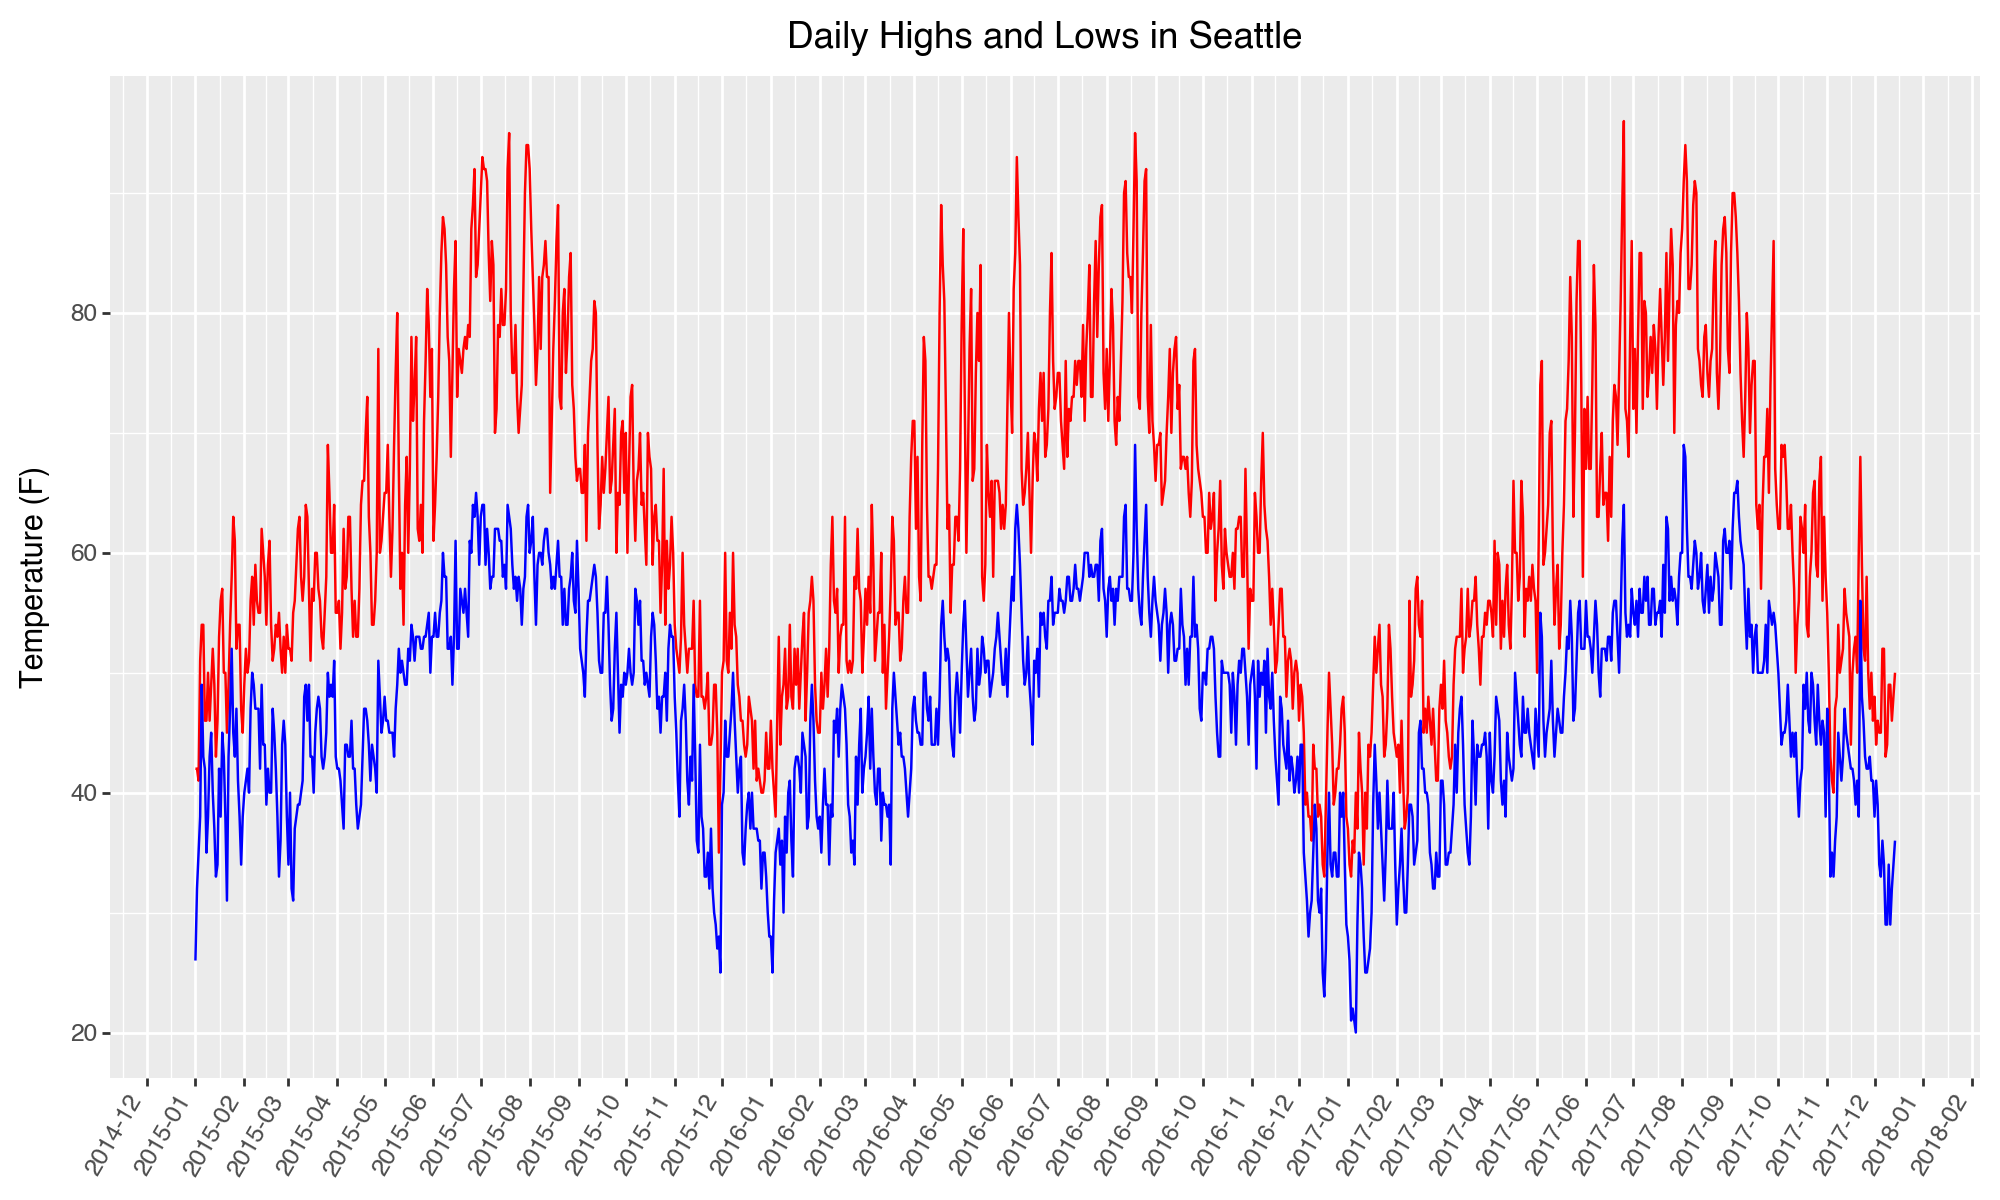

In [9]:
(
    p9.ggplot(weather_recent, p9.aes(x="DATE")) 
    + p9.geom_line(mapping=p9.aes(y="TMAX"), color="red")
    + p9.geom_line(mapping=p9.aes(y="TMIN"), color="blue")
    + p9.labs(
        title="Daily Highs and Lows in Seattle", 
        y="Temperature (F)", 
        x=""
    )
    + p9.scale_x_date(breaks='1 month', labels=lambda d: [entry.strftime("%Y-%m") for entry in d])
    + p9.theme(axis_text_x=p9.element_text(angle=60, hjust=1), figure_size=(10, 6))
)